In [1]:
# Import library
import requests
import zipfile
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_url = '/content/drive/MyDrive/Kuliah/Rakamin Data Science/Materi/dataset.zip'
zip_ref = zipfile.ZipFile(data_url, 'r')
zip_ref.extractall('data/')
zip_ref.close()

## Data Wrangling

### Gathering Data

In [4]:
# Load the dataset
app_train = pd.read_csv('data/application_train.csv')
bureau = pd.read_csv('data/bureau.csv')
bureau_balance = pd.read_csv('data/bureau_balance.csv')
credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
installments_payments = pd.read_csv('data/installments_payments.csv')
pos_cash_balance = pd.read_csv('data/POS_CASH_balance.csv')
previous_application = pd.read_csv('data/previous_application.csv')

In [5]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [7]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [8]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [9]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [10]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [11]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Assessing and Cleaning Data

In [12]:
def analyze_table(df, column_name):
    # Print info table
    print(f"\n---Info Tabel---\n")
    df.info()

    # Print missing values table
    print(f"\n---Missing Value---\n")
    print(missing_data(df))

    # Print duplicated values count
    print(f"\n---Duplicate---\n")
    print(df.duplicated().sum())

    # Print is the table unique or not
    print(f"\n---The table is unique---\n")
    print(df[column_name].is_unique)

    # Print table description
    print(f"\n---Table Description---\n")
    print(df.describe())

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

### Info tabel app_train

In [13]:
analyze_table(app_train, 'SK_ID_CURR')


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB

---Missing Value---

                           Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
...                          ...        ...
NAME_HOUSING_TYPE              0   0.000000
NAME_FAMILY_STATUS             0   0.000000
NAME_EDUCATION_TYPE            0   0.000000
NAME_INCOME_TYPE               0   0.000000
SK_ID_CURR                     0   0.000000

[122 rows x 2 columns]

---Duplicate---

0

---The table is unique---

True

---Table Description---

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.0000

In [14]:
# drop features that have large number of missing values (more than 40%)
app_train.drop(app_train.iloc[:, 40:91], inplace=True, axis=1)

In [15]:
missing_data(app_train)

,Total,Percent
OWN_CAR_AGE,202929,65.990810
OCCUPATION_TYPE,96391,31.345545
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
...,...,...
HOUR_APPR_PROCESS_START,0,0.000000
REG_REGION_NOT_LIVE_REGION,0,0.000000
TARGET,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000


In [16]:
app_train.drop(['OWN_CAR_AGE'], inplace=True, axis=1)

In [17]:
missing_data(app_train)

,Total,Percent
OCCUPATION_TYPE,96391,31.345545
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
...,...,...
HOUR_APPR_PROCESS_START,0,0.000000
REG_REGION_NOT_LIVE_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
TARGET,0,0.000000


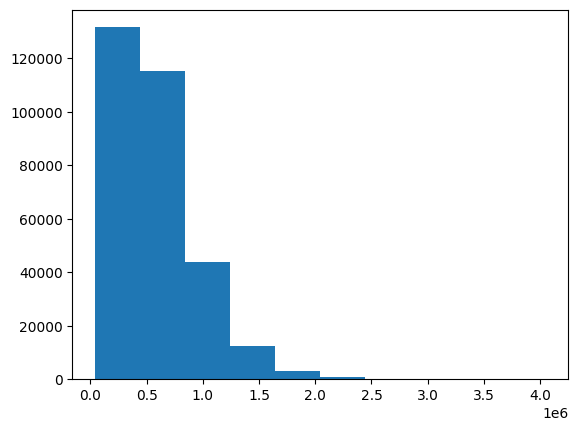

In [18]:
# distribution of numerical features that have missing values
plt.hist(app_train['AMT_GOODS_PRICE'])
plt.show()

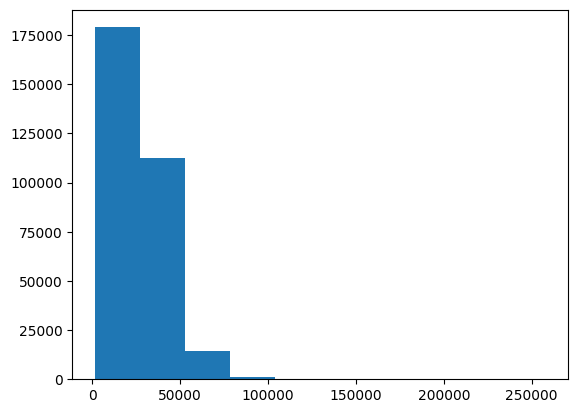

In [19]:
plt.hist(app_train['AMT_ANNUITY'])
plt.show()

In [20]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = app_train.select_dtypes(include=['object']).columns.tolist()
integer_columns = app_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in app_train:
    if app_train[column].isnull().any():
        if(column in category_columns):
            app_train[column]=app_train[column].fillna(app_train[column].mode()[0])
        else:
            app_train[column]=app_train[column].fillna(app_train[column].median())

In [21]:
missing_data(app_train)

,Total,Percent
SK_ID_CURR,0,0.0
FLAG_DOCUMENT_2,0,0.0
FLAG_DOCUMENT_8,0,0.0
FLAG_DOCUMENT_7,0,0.0
FLAG_DOCUMENT_6,0,0.0
...,...,...
REGION_RATING_CLIENT,0,0.0
REGION_RATING_CLIENT_W_CITY,0,0.0
WEEKDAY_APPR_PROCESS_START,0,0.0
HOUR_APPR_PROCESS_START,0,0.0


In [22]:
# # Convert object columns to one hot encoding
# app_train = pd.get_dummies(app_train)
# app_train.head()

### Info tabel bureau

In [23]:
analyze_table(bureau, 'SK_ID_CURR')


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB

---Missing Value---

                          Total    Percent
AMT_ANNUITY             1226791  71.

In [24]:
# drop features that have large number of missing values (more than 60%)
bureau.drop(["AMT_ANNUITY", "AMT_CREDIT_MAX_OVERDUE"], inplace=True, axis=1)

In [25]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = bureau.select_dtypes(include=['object']).columns.tolist()
integer_columns = bureau.select_dtypes(include=['int64','float64']).columns.tolist()

for column in bureau:
    if bureau[column].isnull().any():
        if(column in category_columns):
            bureau[column]=bureau[column].fillna(bureau[column].mode()[0])
        else:
            bureau[column]=bureau[column].fillna(bureau[column].median())

In [26]:
missing_data(bureau)

,Total,Percent
SK_ID_CURR,0,0.0
SK_ID_BUREAU,0,0.0
CREDIT_ACTIVE,0,0.0
CREDIT_CURRENCY,0,0.0
DAYS_CREDIT,0,0.0
CREDIT_DAY_OVERDUE,0,0.0
DAYS_CREDIT_ENDDATE,0,0.0
DAYS_ENDDATE_FACT,0,0.0
CNT_CREDIT_PROLONG,0,0.0
AMT_CREDIT_SUM,0,0.0


In [27]:
# Sort the data by SK_ID_CURR and ascending=False to get the latest values for each ID
sorted_bureau = bureau.sort_values(by="SK_ID_CURR", ascending=False)

# Drop duplicates to keep only the latest values for each ID
df_bureau = sorted_bureau.drop_duplicates(subset="SK_ID_CURR", keep="last")

In [28]:
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
1010005,456255,5126329,Active,currency 1,-573,0,523.0,-897.0,0,553500.0,324171.0,0.0,0.0,Consumer credit,-19
1578578,456254,6669849,Closed,currency 1,-1104,0,-859.0,-859.0,0,45000.0,0.0,0.0,0.0,Consumer credit,-401
479582,456253,5113039,Active,currency 1,-919,0,387.0,-897.0,0,360000.0,171036.0,0.0,0.0,Credit card,-179
1263016,456250,6817236,Closed,currency 1,-1002,0,-272.0,-760.0,0,483349.5,0.0,0.0,0.0,Consumer credit,-127
1534301,456249,5371695,Active,currency 1,-2612,0,-1497.0,-1318.0,0,225000.0,0.0,0.0,0.0,Credit card,-1213


In [29]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305811 entries, 1010005 to 248486
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_CURR              305811 non-null  int64  
 1   SK_ID_BUREAU            305811 non-null  int64  
 2   CREDIT_ACTIVE           305811 non-null  object 
 3   CREDIT_CURRENCY         305811 non-null  object 
 4   DAYS_CREDIT             305811 non-null  int64  
 5   CREDIT_DAY_OVERDUE      305811 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     305811 non-null  float64
 7   DAYS_ENDDATE_FACT       305811 non-null  float64
 8   CNT_CREDIT_PROLONG      305811 non-null  int64  
 9   AMT_CREDIT_SUM          305811 non-null  float64
 10  AMT_CREDIT_SUM_DEBT     305811 non-null  float64
 11  AMT_CREDIT_SUM_LIMIT    305811 non-null  float64
 12  AMT_CREDIT_SUM_OVERDUE  305811 non-null  float64
 13  CREDIT_TYPE             305811 non-null  object 
 14  DAYS_CREDIT_UP

### Info tabel bureau_balance

In [30]:
analyze_table(bureau_balance, 'SK_ID_BUREAU')


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB

---Missing Value---

                Total  Percent
SK_ID_BUREAU        0      0.0
MONTHS_BALANCE      0      0.0
STATUS              0      0.0

---Duplicate---

0

---The table is unique---

False

---Table Description---

       SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00


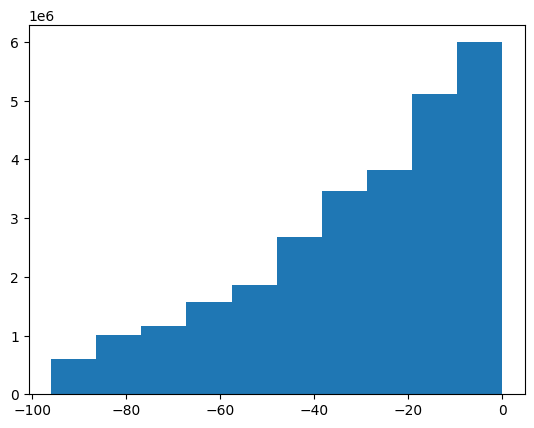

In [31]:
plt.hist(bureau_balance['MONTHS_BALANCE'])
plt.show()

In [32]:
# Sort the data by SK_ID_CURR and ascending=False to get the latest values for each ID
sorted_bureau_balance = bureau_balance.sort_values(by="SK_ID_BUREAU", ascending=False)

# Drop duplicates to keep only the latest values for each ID
df_bureau_balance = sorted_bureau_balance.drop_duplicates(subset="SK_ID_BUREAU", keep="last")

In [33]:
df_bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
23544063,6842888,-60,0
23543985,6842887,-19,C
23543934,6842886,-1,C
23543932,6842885,-23,0
23543895,6842884,-34,X


In [34]:
df_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817395 entries, 23544063 to 26079753
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SK_ID_BUREAU    817395 non-null  int64 
 1   MONTHS_BALANCE  817395 non-null  int64 
 2   STATUS          817395 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.9+ MB


### Info tabel credit_card_balance

In [35]:
analyze_table(credit_card_balance, 'SK_ID_CURR')


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CN

In [36]:
# drop features that have large number of missing values (more than 19%)
credit_card_balance.drop(['AMT_PAYMENT_CURRENT','AMT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT','CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT'], inplace=True, axis=1)

In [37]:
integer_columns = credit_card_balance.select_dtypes(include=['int64','float64']).columns.tolist()

for column in credit_card_balance:
    if credit_card_balance[column].isnull().any():
        credit_card_balance[column]=credit_card_balance[column].fillna(credit_card_balance[column].median())

In [38]:
missing_data(credit_card_balance)

,Total,Percent
SK_ID_PREV,0,0.0
SK_ID_CURR,0,0.0
MONTHS_BALANCE,0,0.0
AMT_BALANCE,0,0.0
AMT_CREDIT_LIMIT_ACTUAL,0,0.0
AMT_DRAWINGS_CURRENT,0,0.0
AMT_INST_MIN_REGULARITY,0,0.0
AMT_PAYMENT_TOTAL_CURRENT,0,0.0
AMT_RECEIVABLE_PRINCIPAL,0,0.0
AMT_RECIVABLE,0,0.0


In [39]:
# Sort the data by SK_ID_CURR and ascending=False to get the latest values for each ID
sorted_credit_card_balance = credit_card_balance.sort_values(by="SK_ID_CURR", ascending=False)

# Drop duplicates to keep only the latest values for each ID
df_credit_card_balance = sorted_credit_card_balance.drop_duplicates(subset="SK_ID_CURR", keep="last")

In [40]:
df_credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1684283,1794451,456250,-10,186577.605,180000,0.0,9892.485,11250.0,178200.000,185907.105,185907.105,0,1.0,Active,0,0
2423678,2743495,456248,-14,0.000,900000,0.0,0.000,0.0,0.000,0.000,0.000,0,0.0,Active,0,0
937004,1595171,456247,-65,67.500,180000,0.0,67.500,0.0,0.000,0.000,0.000,0,27.0,Active,0,0
1729668,1079732,456246,-6,43490.115,135000,45507.6,2250.000,35217.9,43437.555,43490.115,43490.115,8,3.0,Active,0,0
2951369,2181926,456244,-30,418367.115,450000,44386.2,20366.235,22500.0,406710.585,417021.615,417021.615,3,11.0,Active,0,0


In [41]:
df_credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103558 entries, 1684283 to 655566
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SK_ID_PREV                 103558 non-null  int64  
 1   SK_ID_CURR                 103558 non-null  int64  
 2   MONTHS_BALANCE             103558 non-null  int64  
 3   AMT_BALANCE                103558 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL    103558 non-null  int64  
 5   AMT_DRAWINGS_CURRENT       103558 non-null  float64
 6   AMT_INST_MIN_REGULARITY    103558 non-null  float64
 7   AMT_PAYMENT_TOTAL_CURRENT  103558 non-null  float64
 8   AMT_RECEIVABLE_PRINCIPAL   103558 non-null  float64
 9   AMT_RECIVABLE              103558 non-null  float64
 10  AMT_TOTAL_RECEIVABLE       103558 non-null  float64
 11  CNT_DRAWINGS_CURRENT       103558 non-null  int64  
 12  CNT_INSTALMENT_MATURE_CUM  103558 non-null  float64
 13  NAME_CONTRACT_STATUS   

### Info tabel installments_payments

In [42]:
analyze_table(installments_payments, 'SK_ID_CURR')


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB

---Missing Value---

                        Total   Percent
DAYS_ENTRY_PAYMENT       2905  0.021352
AMT_PAYMENT              2905  0.021352
SK_ID_PREV                  0  0.000000
SK_ID_CURR                  0  0.000000
NUM_INSTALMENT_VERSION      0  0.000000
NUM_INSTALMENT_NUMBER       0  0.000000
DAYS_INSTALMENT             0  0.000000
AMT_INSTALMENT              0  0.000000

---Duplicate---

0

---The table is unique---

False

---Table

In [43]:
# impute missing values with median for numerical values
integer_columns = installments_payments.select_dtypes(include=['int64','float64']).columns.tolist()

for column in installments_payments:
    if installments_payments[column].isnull().any():
        installments_payments[column]=installments_payments[column].fillna(installments_payments[column].median())

In [44]:
missing_data(installments_payments)

,Total,Percent
SK_ID_PREV,0,0.0
SK_ID_CURR,0,0.0
NUM_INSTALMENT_VERSION,0,0.0
NUM_INSTALMENT_NUMBER,0,0.0
DAYS_INSTALMENT,0,0.0
DAYS_ENTRY_PAYMENT,0,0.0
AMT_INSTALMENT,0,0.0
AMT_PAYMENT,0,0.0


In [45]:
# Sort the data by SK_ID_CURR and ascending=False to get the latest values for each ID
sorted_installments_payments = installments_payments.sort_values(by="SK_ID_CURR", ascending=False)

# Drop duplicates to keep only the latest values for each ID
df_installments_payments = sorted_installments_payments.drop_duplicates(subset="SK_ID_CURR", keep="last")

In [46]:
df_installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
12075210,2729207,456255,2.0,3,-409.0,-435.0,42754.230,42754.230
12588836,2016407,456254,1.0,2,-217.0,-232.0,19065.825,19065.825
13166482,1668235,456253,1.0,3,-2752.0,-2743.0,3973.095,3945.825
12804434,1503599,456252,1.0,3,-2406.0,-2408.0,10074.465,10074.465
13440535,2248017,456251,1.0,1,-210.0,-237.0,6605.910,6605.910


In [47]:
df_installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339587 entries, 12075210 to 3435373
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_PREV              339587 non-null  int64  
 1   SK_ID_CURR              339587 non-null  int64  
 2   NUM_INSTALMENT_VERSION  339587 non-null  float64
 3   NUM_INSTALMENT_NUMBER   339587 non-null  int64  
 4   DAYS_INSTALMENT         339587 non-null  float64
 5   DAYS_ENTRY_PAYMENT      339587 non-null  float64
 6   AMT_INSTALMENT          339587 non-null  float64
 7   AMT_PAYMENT             339587 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 23.3 MB


### Info tabel pos_cash_balance

In [48]:
analyze_table(pos_cash_balance, 'SK_ID_CURR')


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB

---Missing Value---

                       Total   Percent
CNT_INSTALMENT_FUTURE  26087  0.260835
CNT_INSTALMENT         26071  0.260675
SK_ID_PREV                 0  0.000000
SK_ID_CURR                 0  0.000000
MONTHS_BALANCE             0  0.000000
NAME_CONTRACT_STATUS       0  0.000000
SK_DPD                     0  0.000000
SK_DPD_DEF                 0  0.000000

---Duplicate---

0

---The table is unique---

False

---Table Descri

In [49]:
# impute missing values with median for numerical values
integer_columns = pos_cash_balance.select_dtypes(include=['int64','float64']).columns.tolist()

for column in pos_cash_balance:
    if pos_cash_balance[column].isnull().any():
        pos_cash_balance[column]=pos_cash_balance[column].fillna(pos_cash_balance[column].median())

In [50]:
missing_data(pos_cash_balance)

,Total,Percent
SK_ID_PREV,0,0.0
SK_ID_CURR,0,0.0
MONTHS_BALANCE,0,0.0
CNT_INSTALMENT,0,0.0
CNT_INSTALMENT_FUTURE,0,0.0
NAME_CONTRACT_STATUS,0,0.0
SK_DPD,0,0.0
SK_DPD_DEF,0,0.0


In [51]:
# Sort the data by SK_ID_CURR and ascending=False to get the latest values for each ID
sorted_pos_cash_balance = pos_cash_balance.sort_values(by="SK_ID_CURR", ascending=False)

# Drop duplicates to keep only the latest values for each ID
df_pos_cash_balance = sorted_pos_cash_balance.drop_duplicates(subset="SK_ID_CURR", keep="last")

In [52]:
df_pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
8701943,1743609,456255,-24,12.0,3.0,Active,0,0
9711880,1792910,456254,-7,14.0,10.0,Active,0,0
2768848,1668235,456253,-91,4.0,1.0,Active,5,5
4407706,1503599,456252,-78,6.0,2.0,Active,0,0
2704120,2248017,456251,-5,8.0,5.0,Active,0,0


In [53]:
df_pos_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337252 entries, 8701943 to 1261679
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   SK_ID_PREV             337252 non-null  int64  
 1   SK_ID_CURR             337252 non-null  int64  
 2   MONTHS_BALANCE         337252 non-null  int64  
 3   CNT_INSTALMENT         337252 non-null  float64
 4   CNT_INSTALMENT_FUTURE  337252 non-null  float64
 5   NAME_CONTRACT_STATUS   337252 non-null  object 
 6   SK_DPD                 337252 non-null  int64  
 7   SK_DPD_DEF             337252 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 23.2+ MB


### Info tabel previous_application

In [54]:
analyze_table(previous_application, 'SK_ID_CURR')


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT      

In [55]:
# drop features that have large number of missing values (more than 40%)
# previous_application.drop(previous_application.iloc[:, 40:100], inplace=True, axis=1)
previous_application.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING'], inplace=True, axis=1)

In [56]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = previous_application.select_dtypes(include=['object']).columns.tolist()
integer_columns = previous_application.select_dtypes(include=['int64','float64']).columns.tolist()

for column in previous_application:
    if previous_application[column].isnull().any():
        if(column in category_columns):
            previous_application[column]=previous_application[column].fillna(previous_application[column].mode()[0])
        else:
            previous_application[column]=previous_application[column].fillna(previous_application[column].median())

In [57]:
missing_data(previous_application)

,Total,Percent
SK_ID_PREV,0,0.0
SK_ID_CURR,0,0.0
NAME_YIELD_GROUP,0,0.0
CNT_PAYMENT,0,0.0
NAME_SELLER_INDUSTRY,0,0.0
SELLERPLACE_AREA,0,0.0
CHANNEL_TYPE,0,0.0
NAME_PRODUCT_TYPE,0,0.0
NAME_PORTFOLIO,0,0.0
NAME_GOODS_CATEGORY,0,0.0


In [58]:
# Sort the data by SK_ID_CURR and ascending=False to get the latest values for each ID
sorted_previous_application = previous_application.sort_values(by="SK_ID_CURR", ascending=False)

# Drop duplicates to keep only the latest values for each ID
df_previous_application = sorted_previous_application.drop_duplicates(subset="SK_ID_CURR", keep="last")

In [59]:
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
608510,2073384,456255,Cash loans,16400.610,229500.0,254340.0,229500.0,THURSDAY,12,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle
7315,2016407,456254,Consumer loans,19065.825,223789.5,247423.5,223789.5,SATURDAY,18,Y,...,Repeater,Computers,POS,XNA,Country-wide,3093,Consumer electronics,16.0,low_normal,POS household with interest
181558,1686207,456253,Consumer loans,5567.715,28912.5,27306.0,28912.5,SATURDAY,12,Y,...,Refreshed,Mobile,POS,XNA,Stone,22,Connectivity,6.0,high,POS mobile with interest
444497,1503599,456252,Consumer loans,10074.465,57595.5,56821.5,57595.5,WEDNESDAY,10,Y,...,New,Consumer Electronics,POS,XNA,Country-wide,190,Consumer electronics,6.0,low_normal,POS household without interest
292302,2248017,456251,Consumer loans,6605.910,40455.0,40455.0,40455.0,THURSDAY,17,Y,...,New,Mobile,POS,XNA,Country-wide,30,Connectivity,8.0,high,POS mobile with interest


In [60]:
df_previous_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338857 entries, 608510 to 201668
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   338857 non-null  int64  
 1   SK_ID_CURR                   338857 non-null  int64  
 2   NAME_CONTRACT_TYPE           338857 non-null  object 
 3   AMT_ANNUITY                  338857 non-null  float64
 4   AMT_APPLICATION              338857 non-null  float64
 5   AMT_CREDIT                   338857 non-null  float64
 6   AMT_GOODS_PRICE              338857 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   338857 non-null  object 
 8   HOUR_APPR_PROCESS_START      338857 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  338857 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       338857 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       338857 non-null  object 
 12  NAME_CONTRACT_STATUS         338857 non-null  object 

## Merge Data

In [61]:
# Merge the DataFrames using SK_ID_CURR as the key
app_train = app_train.merge(df_previous_application, on='SK_ID_CURR', how='inner')

# Print the merged DataFrame
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,New,Audio/Video,POS,XNA,Country-wide,1200,Consumer electronics,10.0,high,POS household with interest


In [62]:
# Merge the DataFrames using SK_ID_bureau as the key
app_train = app_train.merge(df_pos_cash_balance, on='SK_ID_CURR', how='inner')

# Print the merged DataFrame
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,SK_ID_PREV_y,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS_y,SK_DPD,SK_DPD_DEF
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,24.0,low_normal,POS other with interest,1038818,-7,24.0,12.0,Active,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,12.0,middle,POS household with interest,2396755,-69,12.0,4.0,Active,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,4.0,middle,POS mobile without interest,1564014,-24,3.0,0.0,Completed,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,48.0,low_normal,Cash X-Sell: low,2299329,-19,12.0,12.0,Active,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,10.0,high,POS household with interest,2119973,-68,10.0,1.0,Active,0,0


In [63]:
# Merge the DataFrames using SK_ID_bureau as the key
app_train = app_train.merge(df_installments_payments, on='SK_ID_CURR', how='inner')

# Print the merged DataFrame
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CONTRACT_STATUS_y,SK_DPD,SK_DPD_DEF,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Active,0,0,1038818,1.0,18,-55.0,-67.0,9251.775,9251.775
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Active,0,0,2636178,1.0,5,-677.0,-690.0,64567.665,64567.665
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Completed,0,0,1564014,1.0,2,-754.0,-763.0,5357.250,5357.250
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Active,0,0,2190416,1.0,7,-101.0,-104.0,29027.520,29027.520
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Active,0,0,2119973,1.0,6,-2176.0,-2172.0,1834.290,1834.290


In [64]:
# Merge the DataFrames using SK_ID_bureau as the key
app_train = app_train.merge(df_credit_card_balance, on='SK_ID_CURR', how='inner')

# Print the merged DataFrame
app_train.head()

<ipython-input-64-f7c3164c758a>:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'SK_ID_PREV_x'} in the result is deprecated and will raise a MergeError in a future version.
  app_train = app_train.merge(df_credit_card_balance, on='SK_ID_CURR', how='inner')


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_y,SK_DPD_DEF_y
0,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0,0.0,Active,0,0
1,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0.0,0.0,0.0,0.0,0.0,0,33.0,Active,0,0
2,100021,0,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,Completed,0,0
3,100023,0,Cash loans,F,N,Y,1,90000.0,544491.0,17563.5,...,0.0,0.0,0.0,0.0,0.0,0,0.0,Active,0,0
4,100036,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,...,0.0,0.0,0.0,0.0,0.0,0,0.0,Active,0,0


In [65]:
# Merge the DataFrames using SK_ID_bureau as the key
merged_bureau = df_bureau.merge(df_bureau_balance, on='SK_ID_BUREAU', how='inner')

# Print the merged DataFrame
merged_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,STATUS
0,456255,5126329,Active,currency 1,-573,0,523.0,-897.0,0,553500.0,324171.0,0.0,0.0,Consumer credit,-19,-18,X
1,456254,6669849,Closed,currency 1,-1104,0,-859.0,-859.0,0,45000.0,0.0,0.0,0.0,Consumer credit,-401,-31,0
2,456253,5113039,Active,currency 1,-919,0,387.0,-897.0,0,360000.0,171036.0,0.0,0.0,Credit card,-179,-27,0
3,456250,6817236,Closed,currency 1,-1002,0,-272.0,-760.0,0,483349.5,0.0,0.0,0.0,Consumer credit,-127,-24,C
4,456247,6022150,Closed,currency 1,-2028,0,-1937.0,-2000.0,0,59850.0,0.0,0.0,0.0,Consumer credit,-1710,-64,0


In [66]:
# Merge the DataFrames using SK_ID_bureau as the key
app_train = app_train.merge(merged_bureau, on='SK_ID_CURR', how='inner')

# Print the merged DataFrame
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,STATUS
0,100043,0,Cash loans,F,N,Y,2,198000.0,641173.5,23157.0,...,-2516.0,0,27720.0,0.0,0.0,0.0,Consumer credit,-2513,-86,X
1,100048,0,Cash loans,F,N,Y,0,202500.0,604152.0,29196.0,...,-66.0,0,22905.0,0.0,0.0,0.0,Microloan,-61,-2,0
2,100050,0,Cash loans,F,N,Y,0,108000.0,746280.0,42970.5,...,-145.0,0,450000.0,0.0,0.0,0.0,Consumer credit,-135,-14,X
3,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,...,-102.0,0,75872.7,0.0,0.0,0.0,Consumer credit,-100,-4,0
4,100100,0,Cash loans,M,Y,Y,2,202500.0,796396.5,38443.5,...,-869.0,0,1287900.0,0.0,0.0,0.0,Car loan,-850,-56,X


In [67]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28925 entries, 0 to 28924
Columns: 140 entries, SK_ID_CURR to STATUS
dtypes: float64(44), int64(64), object(32)
memory usage: 31.1+ MB


In [68]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,STATUS
0,100043,0,Cash loans,F,N,Y,2,198000.0,641173.5,23157.0,...,-2516.0,0,27720.0,0.0,0.0,0.0,Consumer credit,-2513,-86,X
1,100048,0,Cash loans,F,N,Y,0,202500.0,604152.0,29196.0,...,-66.0,0,22905.0,0.0,0.0,0.0,Microloan,-61,-2,0
2,100050,0,Cash loans,F,N,Y,0,108000.0,746280.0,42970.5,...,-145.0,0,450000.0,0.0,0.0,0.0,Consumer credit,-135,-14,X
3,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,...,-102.0,0,75872.7,0.0,0.0,0.0,Consumer credit,-100,-4,0
4,100100,0,Cash loans,M,Y,Y,2,202500.0,796396.5,38443.5,...,-869.0,0,1287900.0,0.0,0.0,0.0,Car loan,-850,-56,X


In [69]:
app_train.drop(["SK_ID_CURR", "SK_ID_BUREAU"], inplace=True, axis=1)

In [70]:
app_train.to_csv('app_train.csv', index=False)